In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("autocorrelation_times.csv")

subset = df[(df['n'] >= 100) & (df['n'] <= 500)]

print(df.head())  

     n    naive     fft
0  100   1.4092  8.2273
1  200   6.7507  6.7787
2  300  14.3169  9.8841
3  400  22.4692  4.3118
4  500  43.0593  4.1020


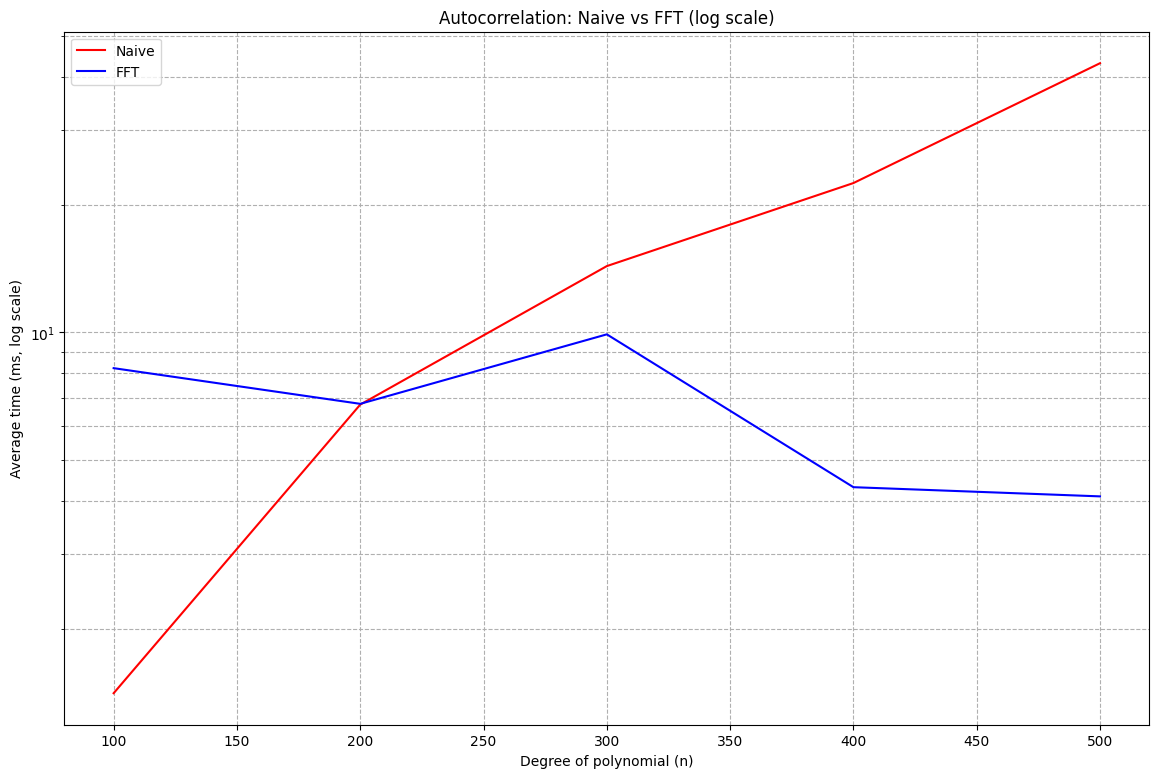

In [3]:
plt.figure(figsize=(14,9))
plt.semilogy(subset['n'], subset['naive'], label='Naive', color='red')
plt.semilogy(subset['n'], subset['fft'], label='FFT', color='blue')


plt.xlabel('Degree of polynomial (n)')
plt.ylabel('Average time (ms, log scale)')
plt.title('Autocorrelation: Naive vs FFT (log scale)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()


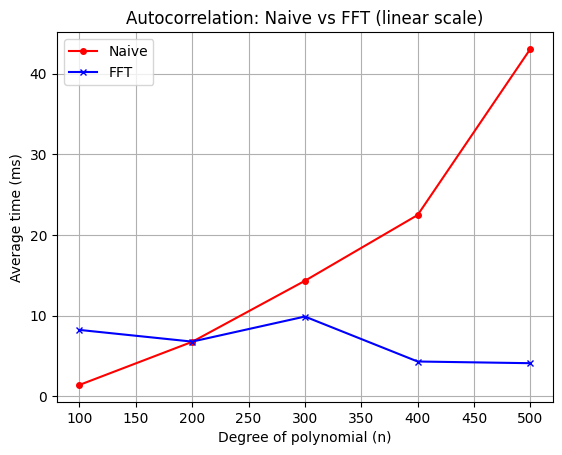

In [4]:
plt.plot(subset['n'], subset['naive'], label='Naive', color='red', marker='o', markersize=4)
plt.plot(subset['n'], subset['fft'], label='FFT', color='blue', marker='x', markersize=4)

plt.xlabel('Degree of polynomial (n)')
plt.ylabel('Average time (ms)')
plt.title('Autocorrelation: Naive vs FFT (linear scale)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
faster_n = df[df['fft'] < df['naive']]['n'].min()
print(f"FFT начинает быть быстрее при n >= {faster_n}")

FFT начинает быть быстрее при n >= 300


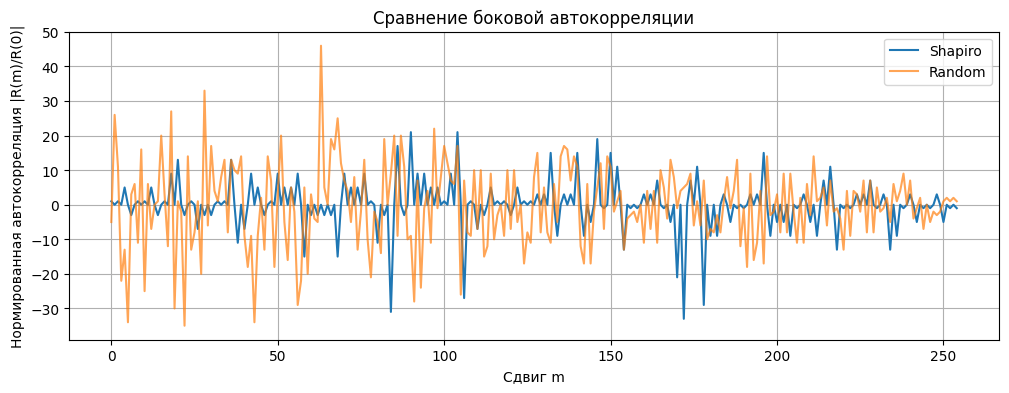

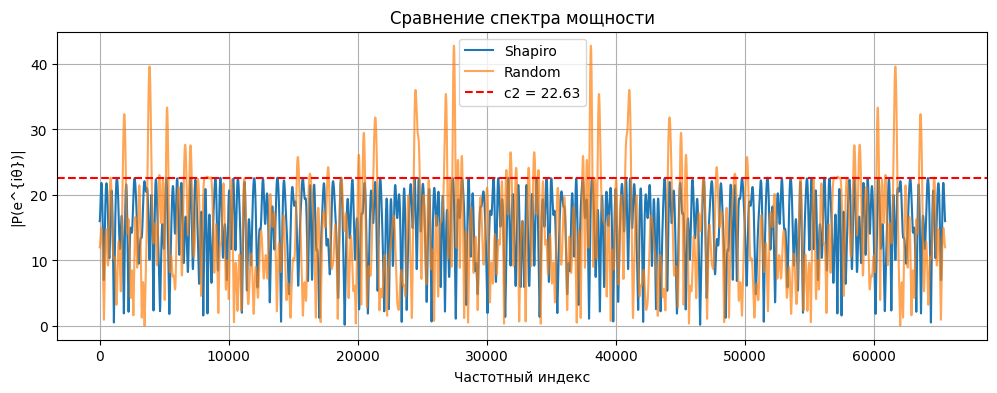

Максимум боковой автокорреляции (норм.)
Flat: 21
Random: 46


In [184]:
with open('../files/random_poly.txt', 'r') as f:
    rand_coeffs = np.array([int(x) for x in f.read().split()])

with open('../files/flat_poly.txt', 'r') as f:
    flat_coeffs = np.array([int(x) for x in f.read().split()])

n = len(flat_coeffs)

c2 = np.sqrt(n*2)

def normalized_side_autocorr(coeffs):
    autocorr = np.correlate(coeffs, coeffs, mode='full')
    n = len(coeffs) - 1
    #R0 = autocorr[n] # нормирующий коэффициент
    side_autocorr = autocorr[n+1:]# / R0
    return side_autocorr

flat_side = normalized_side_autocorr(flat_coeffs)
rand_side = normalized_side_autocorr(rand_coeffs)

# -----------------------------
# 4. Спектр мощности через FFT
# -----------------------------
def spectrum_magnitude(coeffs, fft_size=2**16):
    spectrum = np.fft.fft(coeffs, fft_size)
    return np.abs(spectrum)

flat_spectrum = spectrum_magnitude(flat_coeffs)
rand_spectrum = spectrum_magnitude(rand_coeffs)

# -----------------------------
# 5. Визуализация автокорреляции
# -----------------------------
plt.figure(figsize=(12,4))
plt.plot(flat_side, label='Shapiro')
plt.plot(rand_side, label='Random', alpha=0.7)
plt.xlabel('Сдвиг m')
plt.ylabel('Нормированная автокорреляция |R(m)/R(0)|')
plt.title('Сравнение боковой автокорреляции')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 6. Визуализация спектра мощности
# -----------------------------


plt.figure(figsize=(12,4))
plt.plot(flat_spectrum, label='Shapiro')
plt.plot(rand_spectrum, label='Random', alpha=0.7)
plt.axhline(y=c2, color='red', linestyle='--', label=f'c2 = {c2:.2f}')
plt.xlabel('Частотный индекс')
plt.ylabel('|P(e^{iθ})|')
plt.title('Сравнение спектра мощности')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 7. Печать статистики
# -----------------------------
print("Максимум боковой автокорреляции (норм.)")
print("Flat:", np.max(flat_side))
print("Random:", np.max(rand_side))


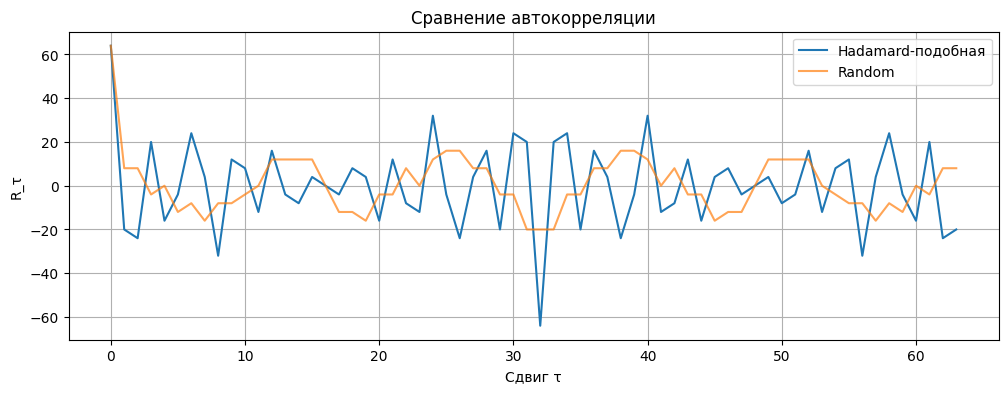

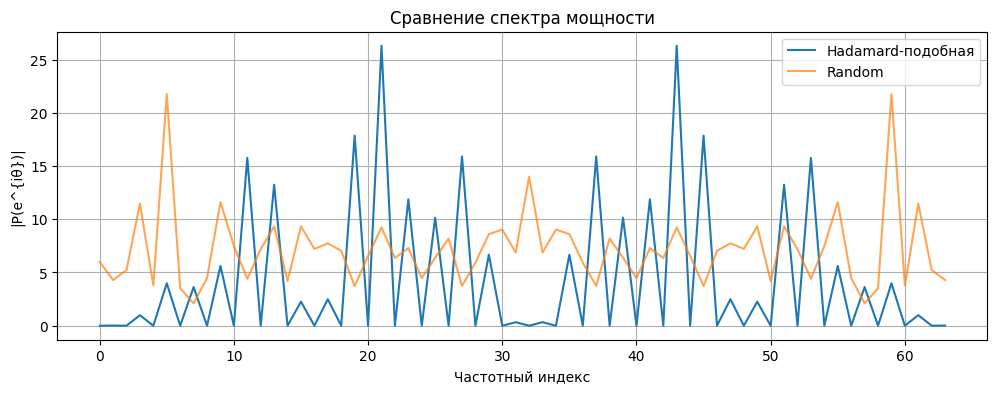

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
n = 6
N = 2**n

# Hadamard-подобная последовательность
def hadamard_row(n, row_index=0):
    row = np.array([1])
    for _ in range(n):
        row = np.concatenate([row, row])
        row = np.where(np.arange(len(row)) < len(row)//2, row, -row)
    return row

hadamard_seq = hadamard_row(n)

# Случайная ±1 последовательность
rand_seq = np.random.choice([-1, 1], size=N)

# Автокорреляция через FFT
def autocorr(seq):
    A = np.fft.fft(seq)
    return np.fft.ifft(np.abs(A)**2).real

R_hadamard = autocorr(hadamard_seq)
R_rand = autocorr(rand_seq)

# График автокорреляции
plt.figure(figsize=(12,4))
plt.plot(R_hadamard, label='Hadamard-подобная')
plt.plot(R_rand, label='Random', alpha=0.7)
plt.xlabel('Сдвиг τ')
plt.ylabel('R_τ')
plt.title('Сравнение автокорреляции')
plt.legend()
plt.grid(True)
plt.show()

# Спектр мощности
def spectrum(seq):
    return np.abs(np.fft.fft(seq))

flat_spectrum = spectrum(hadamard_seq)
rand_spectrum = spectrum(rand_seq)

plt.figure(figsize=(12,4))
plt.plot(flat_spectrum, label='Hadamard-подобная')
plt.plot(rand_spectrum, label='Random', alpha=0.7)
plt.xlabel('Частотный индекс')
plt.ylabel('|P(e^{iθ})|')
plt.title('Сравнение спектра мощности')
plt.legend()
plt.grid(True)
plt.show()
